In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1h0y6QjKA_ZyQX26cNnNLNL0ODKG_B390NEbo1do2RKE/edit#gid=473790132'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf) 
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [ ]:
#check headers name
print(df.columns)
#check columns and rows 
print(df.shape)
#check null values
print(df.info())

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')
(101315, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101315 entries, 0 to 101314
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 101315 non-null  int64  
 1   month                101315 non-null  int64  
 2   carrier              101315 non-null  object 
 3   carrier_name         101315 non-null  object 
 4   airport              101315 non-null  object 
 5   airport_name         101315 non-null  object 
 6   arr_flights          101157 non-null  float64
 7   arr_del15            100960 non-null  float64
 8

In [ ]:
df.describe(percentiles=None)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,101315.000000,101315.000000,101157.000000,100960.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000
mean,2019.516261,6.279633,336.033413,58.073217,18.457503,2.047227,17.234516,0.153487,20.067422,7.969137,0.773362,3817.083069,1319.266744,212.609785,838.294967,7.370395,1439.534031
std,1.558253,3.438409,942.283273,163.327000,47.042014,6.878678,58.427910,0.734138,63.043181,50.943481,3.395803,11715.243158,3941.461650,810.274436,3390.448796,44.296998,4636.488256
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,42.000000,5.000000,1.920000,0.000000,0.940000,0.000000,1.000000,0.000000,0.000000,265.000000,86.000000,0.000000,24.000000,0.000000,42.000000
50%,2020.000000,6.000000,90.000000,14.000000,5.280000,0.240000,3.200000,0.000000,3.960000,1.000000,0.000000,865.000000,316.000000,12.000000,120.000000,0.000000,253.000000
75%,2021.000000,9.000000,227.000000,40.000000,14.610000,1.660000,9.850000,0.000000,12.640000,4.000000,1.000000,2520.000000,990.000000,132.000000,401.000000,0.000000,916.000000
max,2022.000000,12.000000,21931.000000,4176.000000,1147.000000,226.000000,1884.420000,58.690000,1531.810000,4951.000000,154.000000,429194.000000,151581.000000,28294.000000,112018.000000,3760.000000,147167.000000


In [ ]:
# check distinct value of columns
distinct_values = df.nunique()
distinct_values 


year                       6
month                     12
carrier                   19
carrier_name              20
airport                  384
airport_name             384
arr_flights             4429
arr_del15               1452
carrier_ct             10872
weather_ct              3095
nas_ct                 10470
security_ct              749
late_aircraft_ct       11340
arr_cancelled            519
arr_diverted              96
arr_delay              15377
carrier_delay           9130
weather_delay           3420
nas_delay               7269
security_delay           511
late_aircraft_delay     9748
dtype: int64

In [ ]:
#count missing values(NaN)
a=df.isna()
missing_values = a.sum(False)
missing_values.sort_values(ascending=False)

arr_del15              355
nas_ct                 158
security_ct            158
security_delay         158
nas_delay              158
weather_delay          158
carrier_delay          158
arr_delay              158
arr_diverted           158
arr_cancelled          158
late_aircraft_ct       158
late_aircraft_delay    158
weather_ct             158
carrier_ct             158
arr_flights            158
month                    0
airport_name             0
airport                  0
carrier_name             0
carrier                  0
year                     0
dtype: int64

Text(0.5, 0, 'Values')

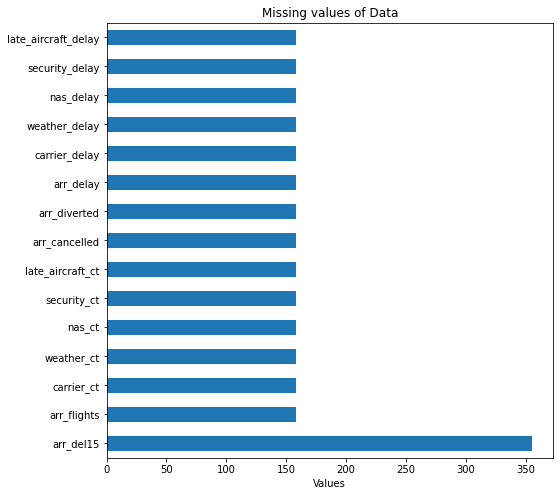

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
missing_values[missing_values!=0].sort_values(ascending=False).plot(kind='barh')
ax.set_title('Missing values of Data')
ax.set_xlabel('Values')

Text(0.5, 0, 'Values')

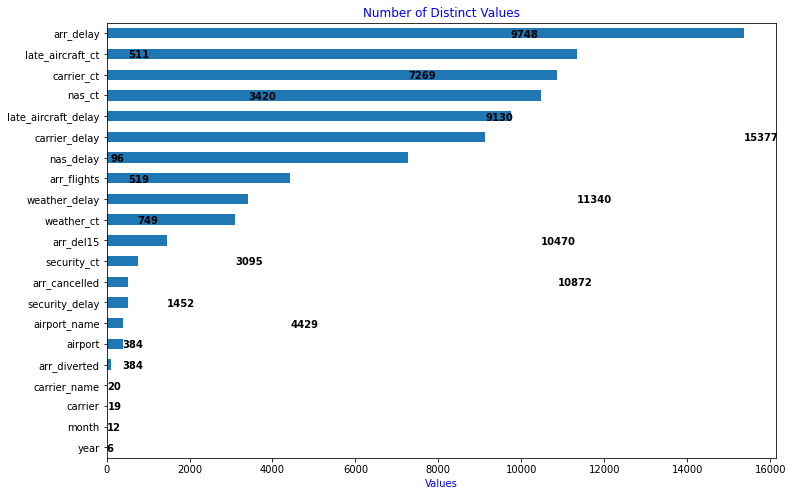

In [ ]:
# count distinc value of dataframe 
fig, ax = plt.subplots(figsize=(12,8))
distinct_values.sort_values(ascending=True).plot(kind='barh')

for i,j in enumerate(distinct_values):
  ax.text(j,i-0.2,j,weight='bold')

ax.set_title('Number of Distinct Values',c='b')
ax.set_xlabel('Values',c='b')

# Explore Data

In [ ]:
#explore data flight based on number of flight
number_arr_flights = df.groupby(['carrier_name'], as_index=False)[['arr_flights']].sum()
number_arr_flights.sort_values(by='arr_flights', ascending=False, inplace=True)
px.bar(number_arr_flights,x='carrier_name', y='arr_flights', text_auto='arr_flights', title='Number of flight arriving each airplane ', color='carrier_name')

In [ ]:
#explore data flight based on number of flight each year
number_arr_flights_of_year = df.groupby(['carrier_name','year'], as_index=False)[['arr_flights']].sum()
number_arr_flights_of_year.sort_values(by='arr_flights', ascending=False, inplace=True)
number_arr_flights_of_year.reset_index(drop=True,inplace=True)
number_arr_flights_of_year=number_arr_flights_of_year.set_index('year')
number_arr_flights_of_year



,carrier_name,arr_flights
year,,
2019,Southwest Airlines Co.,1363946.0
2018,Southwest Airlines Co.,1352552.0
2017,Southwest Airlines Co.,1329444.0
2021,Southwest Airlines Co.,1064640.0
2019,Delta Air Lines Inc.,991986.0
...,...,...
2020,ExpressJet Airlines LLC,52135.0
2022,Hawaiian Airlines Inc.,42212.0
2020,Hawaiian Airlines Inc.,40414.0


In [ ]:
# numbers of flight arriving at airport 2017
flight_2017 = df.query('year==2017').reset_index(drop=True) # filtering year 2017

# grouping carrier name
number_arr_flights_of_2017 = flight_2017.groupby(['carrier_name'], as_index=False)[['arr_flights']].sum()
#sorting descending
number_arr_flights_of_2017.sort_values(by='arr_flights', ascending=False, inplace=True)
#plotting
px.bar(number_arr_flights_of_2017, x='arr_flights', y='carrier_name',text_auto='arr_flights', title='Number of flight arriving each airplane in 2017 ',color='arr_flights')

In [ ]:
# flight delay by carriers in 2018
flight_2018 = df.query('year==2018').reset_index(drop=True) # filtering year 2018
# groupby year 
number_flight_delay2018 = flight_2018.groupby(['carrier_name'], as_index=False)[['carrier_ct']].sum()
#sorting descending
number_flight_delay2018.sort_values(by='carrier_ct', ascending=False, inplace=True)
#plotting
px.bar(number_flight_delay2018, x='carrier_ct', y='carrier_name',text_auto='carrier_ct', title='Numbers of flight delay by carrier in 2018',color='carrier_ct')

In [ ]:
# flight delay by carriers in 2019
flight_2019 = df.query('year==2019').reset_index(drop=True) # filtering year 2019
# groupby year 
number_flight_delay2019 = flight_2019.groupby(['carrier_name'], as_index=False)[['carrier_ct']].sum()
#sorting descending
number_flight_delay2019.sort_values(by='carrier_ct', ascending=False, inplace=True)
#plotting
px.bar(number_flight_delay2019, x='carrier_ct', y='carrier_name',text_auto='carrier_ct', title='Numbers of flight delay by carrier in 2019',color='carrier_ct')

In [ ]:
# flight delay by carriers in 2019
flight_2020 = df.query('year==2020').reset_index(drop=True) # filtering year 2019
# groupby year 
number_flight_delay2020 = flight_2020.groupby(['carrier_name'], as_index=False)[['carrier_ct']].sum()
#sorting descending
number_flight_delay2020.sort_values(by='carrier_ct', ascending=False, inplace=True)
#plotting
px.bar(number_flight_delay2020, x='carrier_ct', y='carrier_name',text_auto='carrier_ct', title='Numbers of flight delay by carrier in 2019',color='carrier_ct')

In [ ]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,101315.000000,101315.000000,101157.000000,100960.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000
mean,2019.516261,6.279633,336.033413,58.073217,18.457503,2.047227,17.234516,0.153487,20.067422,7.969137,0.773362,3817.083069,1319.266744,212.609785,838.294967,7.370395,1439.534031
std,1.558253,3.438409,942.283273,163.327000,47.042014,6.878678,58.427910,0.734138,63.043181,50.943481,3.395803,11715.243158,3941.461650,810.274436,3390.448796,44.296998,4636.488256
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,42.000000,5.000000,1.920000,0.000000,0.940000,0.000000,1.000000,0.000000,0.000000,265.000000,86.000000,0.000000,24.000000,0.000000,42.000000
50%,2020.000000,6.000000,90.000000,14.000000,5.280000,0.240000,3.200000,0.000000,3.960000,1.000000,0.000000,865.000000,316.000000,12.000000,120.000000,0.000000,253.000000
75%,2021.000000,9.000000,227.000000,40.000000,14.610000,1.660000,9.850000,0.000000,12.640000,4.000000,1.000000,2520.000000,990.000000,132.000000,401.000000,0.000000,916.000000
max,2022.000000,12.000000,21931.000000,4176.000000,1147.000000,226.000000,1884.420000,58.690000,1531.810000,4951.000000,154.000000,429194.000000,151581.000000,28294.000000,112018.000000,3760.000000,147167.000000


In [ ]:
# delay category

df["DelayGroup"] = None
df.loc[df["arr_del15"] == 0, "DelayGroup"] = "No_Delay"

df.loc[
    (df["arr_del15"] > 0) & (df["arr_del15"] <= 15), "DelayGroup"] = "Small_Delay"

df.loc[
    (df["arr_del15"] > 15) & (df["arr_del15"] <= 30), "DelayGroup"] = "Medium_Delay"

df.loc[df["arr_del15"] > 30, "DelayGroup"] = "Large_Delay"

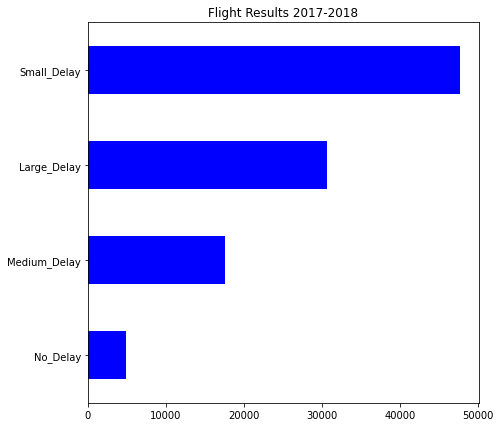

In [ ]:
# count delay by category
fig, ax = plt.subplots(figsize=(7, 7))
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(7, 7), color='b', title="Flight Results 2017-2018")

plt.show()

In [ ]:
# visualize category of delay
df_airline_delay_agg = df.groupby("year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["No_Delay", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_airline_delay_agg[col_order].style.background_gradient(cmap="viridis")

DelayGroup,No_Delay,Small_Delay,Medium_Delay,Large_Delay
year,,,,
2017,2.319443,37.902903,18.827481,40.950172
2018,3.342879,43.065864,18.941032,34.650225
2019,3.149042,42.031825,20.079323,34.739810
2020,11.624281,62.438841,11.699554,14.237325
2021,4.440765,50.991018,16.754478,27.813739
2022,2.674291,42.469094,19.502144,35.354470


In [ ]:
df_airline_delay_agg

DelayGroup,Large_Delay,Medium_Delay,No_Delay,Small_Delay
year,,,,
2017,40.950172,18.827481,2.319443,37.902903
2018,34.650225,18.941032,3.342879,43.065864
2019,34.739810,20.079323,3.149042,42.031825
2020,14.237325,11.699554,11.624281,62.438841
2021,27.813739,16.754478,4.440765,50.991018
2022,35.354470,19.502144,2.674291,42.469094


In [ ]:
df_airline_delay_agg = df.groupby("month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["No_Delay", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_airline_delay_agg[col_order].style.background_gradient(cmap="Purples")

DelayGroup,No_Delay,Small_Delay,Medium_Delay,Large_Delay
month,,,,
1,4.209267,48.433761,17.859474,29.497498
2,3.181252,49.224499,18.079928,29.514321
3,4.721791,49.578807,16.925294,28.774108
4,8.496072,48.776655,15.173962,27.553311
5,7.995418,46.483391,16.219931,29.301260
6,4.364005,41.892197,17.997294,35.746504
7,2.974648,40.439437,18.828169,37.757746
8,3.490516,43.045311,18.769758,34.694415
9,5.957777,52.765186,17.031473,24.245564
